# Text to Speech Demo (Seamless M4T)

```bash
pip install transformers --upgrade
pip install accelerate --upgrade
pip install sentencepiece --upgrade
pip install protobuf
```

In [1]:
import matplotlib.pyplot as graph
from transformers import AutoProcessor, SeamlessM4Tv2Model
from IPython.display import display, Audio
graph.style.use('fivethirtyeight')


model_name = 'facebook/seamless-m4t-v2-large'

/home/sar/miniconda3/envs/ai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sar/miniconda3/envs/ai/lib/python3.12/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [2]:
processor = AutoProcessor.from_pretrained(model_name)
model = SeamlessM4Tv2Model.from_pretrained(model_name)

SAMPLE_RATE = processor.feature_extractor.sampling_rate

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


## Text to Speech (English to English)

In [3]:
test_string = 'Hey folks.'\
    ' This is a test to see the text to speech ability of M4T.'\
    ' Also! you\'re pretty cool Anthony.'

print(test_string)

Hey folks. This is a test to see the text to speech ability of M4T. Also! you're pretty cool Anthony.


In [4]:
string_tokenized = processor(text=test_string, return_tensors='pt')

print(type(string_tokenized))
print(string_tokenized['input_ids'].shape)
print(string_tokenized['input_ids'])

<class 'transformers.tokenization_utils_base.BatchEncoding'>
torch.Size([1, 30])
tensor([[256022,  56609, 197490, 247676,  10257,    254,     10,   6816,    243,
           6947,    321,  29568,    243, 203895, 130744,    290,     77, 247799,
         247776, 247676,  89981, 248054,   3626, 247729,     49, 187056,  87346,
          61574, 247676,      3]])


In [5]:
%%time
# Generate the audio
waveform = model.generate(**string_tokenized, tgt_lang='eng')
waveform = waveform[0].cpu().numpy().squeeze()

CPU times: user 30.1 s, sys: 43.7 ms, total: 30.1 s
Wall time: 4.32 s


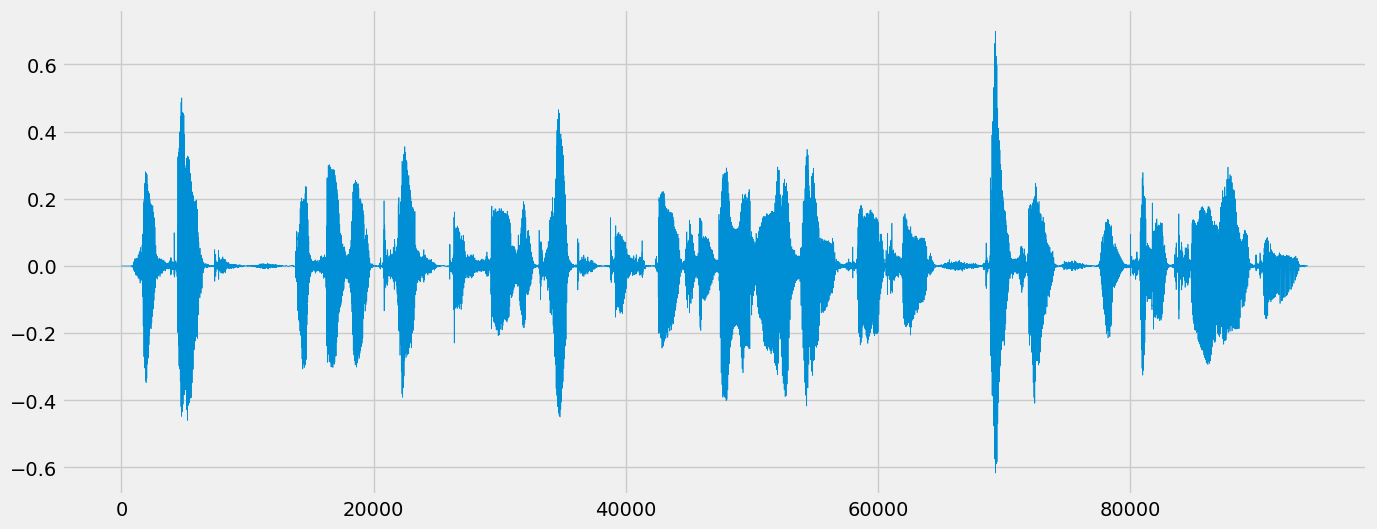

In [6]:
graph.figure(figsize=(15, 6))
graph.plot(waveform, linewidth=0.5)
graph.grid(True)
graph.show()

display(Audio(waveform, rate=SAMPLE_RATE))

## Speech to Text (English to English)

In [7]:
audio_tokenized = processor(audios=waveform, sampling_rate=SAMPLE_RATE, return_tensors='pt')

print(type(audio_tokenized))
print(audio_tokenized['input_features'].shape)
print(audio_tokenized['input_features'])

<class 'transformers.feature_extraction_utils.BatchFeature'>
torch.Size([1, 293, 160])
tensor([[[-2.1957, -2.0619, -2.4370,  ..., -2.1656, -2.1414, -2.0017],
         [-5.1461, -4.8741, -4.1128,  ..., -2.2953, -2.1879, -2.0125],
         [-0.6407, -0.3353, -0.8964,  ..., -0.3195, -0.2130, -0.0687],
         ...,
         [-0.4114,  0.6419,  1.3806,  ..., -0.9379, -0.9803, -0.9379],
         [-0.3911,  0.2337,  1.1635,  ..., -1.5712, -1.5060, -1.4773],
         [-1.2326, -1.6421, -1.6808,  ..., -1.9169, -1.9951, -1.8156]]])


In [8]:
%%time
# Generate the text
output_tokens = model.generate(**audio_tokenized, tgt_lang='eng', generate_speech=False)
output_string = processor.batch_decode(output_tokens[0].tolist()[0], skip_special_tokens=True)

CPU times: user 29.6 s, sys: 954 ms, total: 30.6 s
Wall time: 3.86 s


In [9]:
print(' '.join(output_string))
print(test_string)

  Hey Fox , this is a test to see the text of the speech of Fort y Four , also you ' re Anthony Anthony . 
Hey folks. This is a test to see the text to speech ability of M4T. Also! you're pretty cool Anthony.
